In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [22]:
# Load the data
data = pd.read_csv("cardata.csv")

# Explore the data
print(data.head())
print(data.describe())
print(data.info())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.32000

In [23]:
# Convert categorical features into numerical ones
le = LabelEncoder()
data['Seller_Type'] = le.fit_transform(data['Seller_Type'])
data['Fuel_Type'] = le.fit_transform(data['Fuel_Type'])
data['Transmission'] = le.fit_transform(data['Transmission'])
data['Owner'] = le.fit_transform(data['Owner'])

# One-hot encoding for Car_Name
data = pd.get_dummies(data, columns=['Car_Name'], drop_first=True)


In [24]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
# e.g., data.fillna(method='ffill', inplace=True)


Year                      0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Fuel_Type                 0
                         ..
Car_Name_sx4              0
Car_Name_verna            0
Car_Name_vitara brezza    0
Car_Name_wagon r          0
Car_Name_xcent            0
Length: 105, dtype: int64


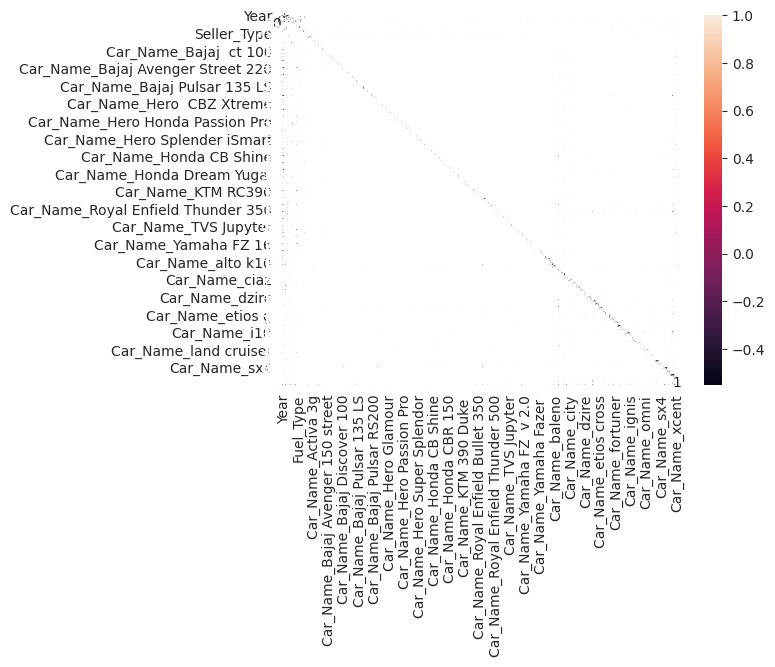

In [26]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [27]:
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [29]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 8.74816442294324
R-squared: 0.62023258340861


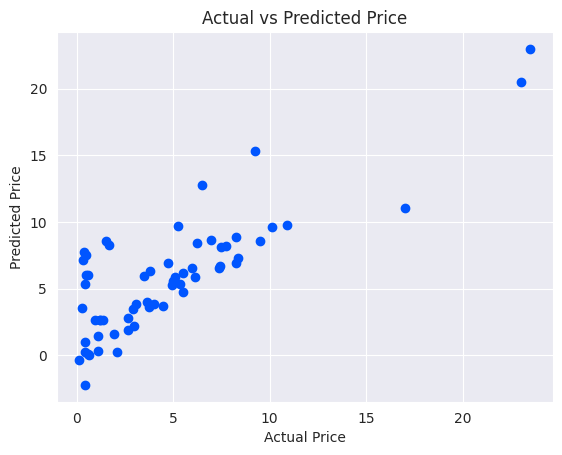

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


In [31]:
print(model.coef_)

[ 5.60703484e-01  6.18123969e-01 -3.05808297e-06 -2.38488578e-01
 -1.24453543e+00 -2.24956464e-01  2.81209238e-01 -3.85266215e+00
 -6.91779967e-12 -5.96826246e+00 -6.34129177e+00 -6.45153670e+00
 -6.78381666e+00 -5.99394929e+00 -3.87850554e+00 -4.89238725e+00
 -4.73247307e+00 -6.71423132e+00  3.83071352e-12 -5.45049582e+00
 -2.92571521e+00 -4.89662140e+00 -4.61699213e+00 -6.32960431e+00
 -2.26613072e+00 -5.34568455e+00 -5.38738453e+00 -4.98337390e+00
 -3.69178910e+00 -4.20714349e+00 -1.96682397e+00 -6.24104200e+00
 -6.36336679e+00 -6.46199454e+00 -5.94846948e+00 -4.34596955e-01
  1.84370297e-11 -7.24141131e+00 -6.78354122e+00 -1.64830133e+00
  2.60245263e-11 -6.00450295e+00 -4.10588903e+00 -5.51667603e+00
  1.14575016e-11 -3.48180310e+00 -6.51007077e+00 -5.80888316e+00
 -6.55852117e+00 -6.10608910e+00 -6.22653983e+00 -6.27305573e+00
 -5.42310070e+00 -2.75266842e+00 -4.86898340e+00 -5.72219639e+00
 -2.46022932e+00 -5.60572989e+00 -4.64696518e+00 -5.63506956e+00
 -6.97445588e+00 -3.48308

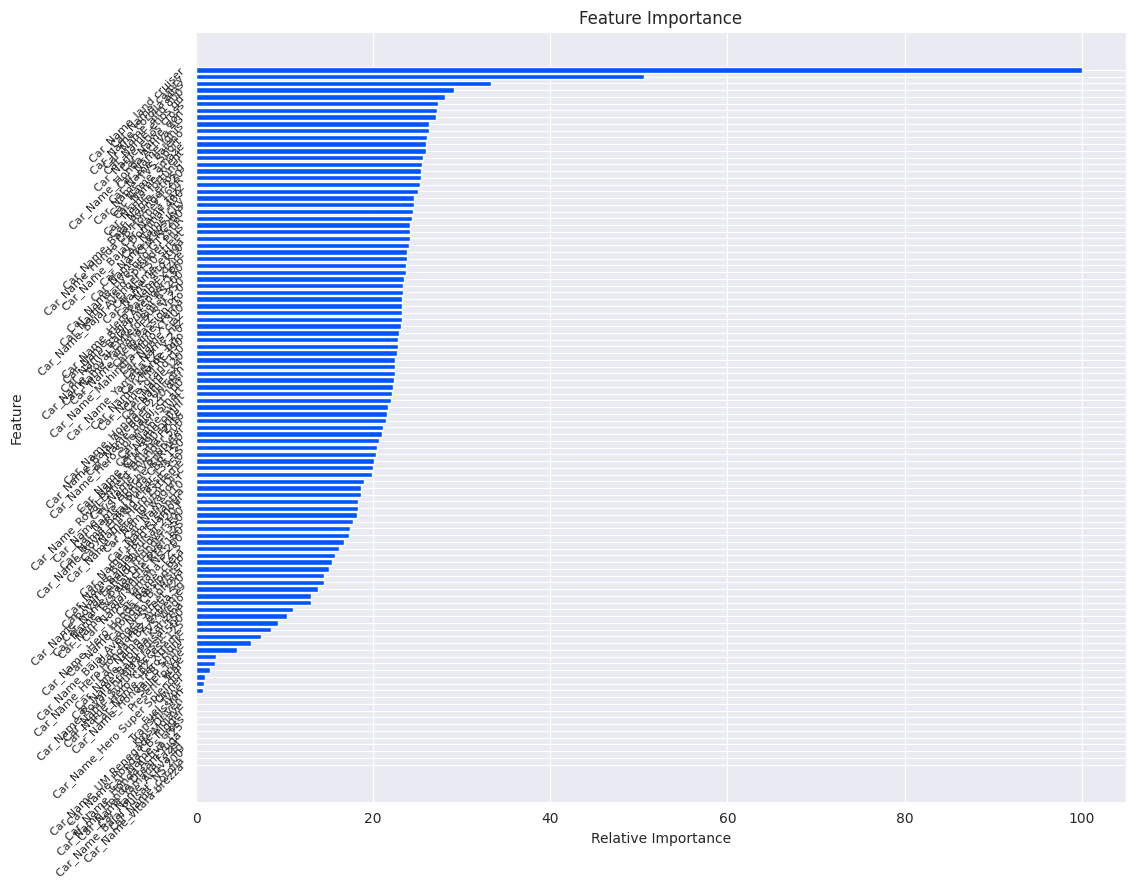

In [36]:

# Assuming X is your feature matrix
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], height=0.8)
plt.yticks(pos, X.columns[sorted_idx], rotation=45, ha='right', fontsize=8)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
